## インポート

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# データを解凍し準備する

In [2]:
!ls /content/drive/MyDrive/DS入門講座/data/test/トリミングテスト

interim  raw  sample.zip


In [3]:
!unzip /content/drive/MyDrive/DS入門講座/data/test/トリミングテスト/sample.zip

Archive:  /content/drive/MyDrive/DS入門講座/data/test/トリミングテスト/sample.zip
   creating: .ipynb_checkpoints/
   creating: 0/
   creating: 1/
  inflating: 0/0-0001.jpg            
  inflating: 0/0-0002.jpg            
  inflating: 0/0-0003.jpg            
  inflating: 0/0-0004.jpg            
  inflating: 0/0-0005.jpg            
  inflating: 0/0-0006.jpg            
  inflating: 0/0-0007.jpg            
  inflating: 0/0-0008.jpg            
  inflating: 0/0-0009.jpg            
  inflating: 0/0-0010.jpg            
  inflating: 0/0-0011.jpg            
  inflating: 0/0-0012.jpg            
  inflating: 0/0-0013.jpg            
  inflating: 0/0-0014.jpg            
  inflating: 0/0-0015.jpg            
  inflating: 0/0-0016.jpg            
  inflating: 0/0-0017.jpg            
  inflating: 0/0-0018.jpg            
  inflating: 0/0-0019.jpg            
  inflating: 0/0-0020.jpg            
  inflating: 0/0-0021.jpg            
  inflating: 0/0-0022.jpg            
  inflating: 0/0-0023.jpg   

In [4]:
!ls /content/0

0-0001.jpg  0-0022.jpg	0-0043.jpg  0-0064.jpg	0-0085.jpg  0-0106.jpg
0-0002.jpg  0-0023.jpg	0-0044.jpg  0-0065.jpg	0-0086.jpg  0-0107.jpg
0-0003.jpg  0-0024.jpg	0-0045.jpg  0-0066.jpg	0-0087.jpg  0-0108.jpg
0-0004.jpg  0-0025.jpg	0-0046.jpg  0-0067.jpg	0-0088.jpg  0-0109.jpg
0-0005.jpg  0-0026.jpg	0-0047.jpg  0-0068.jpg	0-0089.jpg  0-0110.jpg
0-0006.jpg  0-0027.jpg	0-0048.jpg  0-0069.jpg	0-0090.jpg  0-0111.jpg
0-0007.jpg  0-0028.jpg	0-0049.jpg  0-0070.jpg	0-0091.jpg  0-0112.jpg
0-0008.jpg  0-0029.jpg	0-0050.jpg  0-0071.jpg	0-0092.jpg  0-0113.jpg
0-0009.jpg  0-0030.jpg	0-0051.jpg  0-0072.jpg	0-0093.jpg  0-0114.jpg
0-0010.jpg  0-0031.jpg	0-0052.jpg  0-0073.jpg	0-0094.jpg  0-0115.jpg
0-0011.jpg  0-0032.jpg	0-0053.jpg  0-0074.jpg	0-0095.jpg  0-0116.jpg
0-0012.jpg  0-0033.jpg	0-0054.jpg  0-0075.jpg	0-0096.jpg  0-0117.jpg
0-0013.jpg  0-0034.jpg	0-0055.jpg  0-0076.jpg	0-0097.jpg  0-0118.jpg
0-0014.jpg  0-0035.jpg	0-0056.jpg  0-0077.jpg	0-0098.jpg  0-0119.jpg
0-0015.jpg  0-0036.jpg	0-0057.jpg 

In [5]:
! ls /content/1

1-0001.jpg  1-0013.jpg	1-0025.jpg  1-0037.jpg	1-0049.jpg  1-0061.jpg
1-0002.jpg  1-0014.jpg	1-0026.jpg  1-0038.jpg	1-0050.jpg  1-0062.jpg
1-0003.jpg  1-0015.jpg	1-0027.jpg  1-0039.jpg	1-0051.jpg  1-0063.jpg
1-0004.jpg  1-0016.jpg	1-0028.jpg  1-0040.jpg	1-0052.jpg  1-0064.jpg
1-0005.jpg  1-0017.jpg	1-0029.jpg  1-0041.jpg	1-0053.jpg  1-0065.jpg
1-0006.jpg  1-0018.jpg	1-0030.jpg  1-0042.jpg	1-0054.jpg  1-0066.jpg
1-0007.jpg  1-0019.jpg	1-0031.jpg  1-0043.jpg	1-0055.jpg  1-0067.jpg
1-0008.jpg  1-0020.jpg	1-0032.jpg  1-0044.jpg	1-0056.jpg  1-0068.jpg
1-0009.jpg  1-0021.jpg	1-0033.jpg  1-0045.jpg	1-0057.jpg  1-0069.jpg
1-0010.jpg  1-0022.jpg	1-0034.jpg  1-0046.jpg	1-0058.jpg
1-0011.jpg  1-0023.jpg	1-0035.jpg  1-0047.jpg	1-0059.jpg
1-0012.jpg  1-0024.jpg	1-0036.jpg  1-0048.jpg	1-0060.jpg


In [6]:
#前処理の定義
transform = transforms.Compose([
                                transforms.ToTensor()
])

# Datasetの定義

In [7]:
class MyDataset(Dataset):
    def __init__(self, dir_name:str, transform=None):
        '''
        dir_name:画像ファイルの親ディレクトリを指定
        '''
        self.dir_name = dir_name
        self.file_list = os.listdir(dir_name)
        self.label = int(os.path.basename(dir_name))
        self.transform = transform
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self, i):
        img = Image.open(os.path.join(self.dir_name, self.file_list[i]))
        if self.transform is not None:
            img = self.transform(img)
            return img, self.label


### ラベルごとにデータセットインスタンスを作成→合成する

In [8]:
dir = '/content/0'
dataset_0 = MyDataset(dir, transform)

In [9]:

dir = '/content/1'
dataset_1 = MyDataset(dir, transform)

In [10]:
dataset_0_1 = ConcatDataset([dataset_0, dataset_1])

## データセットを訓練用と検証用にランダムに分割

In [11]:
n_samples = len(dataset_0_1) # n_samples is 60000
train_size = int(len(dataset_0_1) * 0.8) # train_size is 48000
val_size = n_samples - train_size # val_size is 48000

In [12]:
train_dataset, val_dataset = torch.utils.data.random_split(dataset_0_1, [train_size, val_size])

# Dataset Loaderの定義

### 定義
バッチサイズは全データ数を割り切れる数にしなければならない

In [13]:
#trainデータの数
len(train_dataset)

153

In [14]:
#validationデータの数
len(val_dataset)

39

In [15]:
#データローダーを作成
train_dataloader = DataLoader(train_dataset, batch_size=51, shuffle=True)
validation_dataloader = DataLoader(val_dataset, batch_size=13, shuffle=False)

### データの中身を確認

In [16]:
data_iter = iter(train_dataloader)

In [17]:
imgs, labels = data_iter.next() #イテレーターの中身を一つずつ出してくれる

In [18]:
labels

tensor([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1])

In [19]:
imgs.size()

torch.Size([51, 1, 64, 64])

In [20]:
grid_imgs = torchvision.utils.make_grid(imgs[:24])

In [21]:
grid_imgs_arr = grid_imgs.numpy()

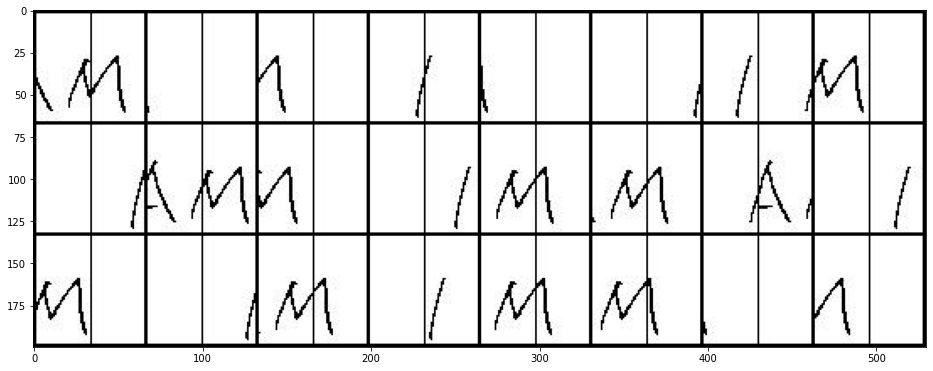

In [22]:
plt.figure(figsize=(16, 24))
plt.imshow(np.transpose(grid_imgs_arr, (1, 2, 0)))

In [23]:
#GPUを使う場合
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## ネットワークの定義

In [24]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),#32*32*64
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),#16*16*128
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),#8*8*256
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        #ここまでが特徴量抽出
        self.classifier = nn.Linear(in_features=8 * 8 * 128, out_features=num_classes) #全結合層
    def forward(self, x): #順伝播
        x = self.features(x) #8*8*128の画像が出てくる
        x = x.view(x.size(0), -1) #1次元のベクトル化 size(0)→バッチ数。「-1」残りは自動的に計算される
        x = self.classifier(x)
        return x

In [25]:
model = CNN(2)
model.to(device)

CNN(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
  )
  (classifier): Linear(in_features=8192, out_features=2, bias=True)
)

# 計算

In [26]:
criterion = nn.CrossEntropyLoss() #交差エントロピー誤差
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4) #Adamを指定

In [27]:
num_epochs = 30
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)
    #
    # validation loop
    #
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float())
    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)
    print("epoch: {}, loss: {}, acc: {}, \
     val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch: 0, loss: 0.7508823076883951, acc: 0.6339869499206543,      val loss: 0.6986990571022034, val acc: 0.3333333432674408
epoch: 1, loss: 0.6937835812568665, acc: 0.5686274766921997,      val loss: 0.6821092963218689, val acc: 0.6666666865348816
epoch: 2, loss: 0.6741988857587179, acc: 0.6339869499206543,      val loss: 0.6433924635251363, val acc: 0.6666666865348816
epoch: 3, loss: 0.6738576094309489, acc: 0.6339869499206543,      val loss: 0.6406835317611694, val acc: 0.6666666865348816
epoch: 4, loss: 0.6591799457867941, acc: 0.6339869499206543,      val loss: 0.6488683025042216, val acc: 0.6666666865348816
epoch: 5, loss: 0.6590834657351176, acc: 0.6339869499206543,      val loss: 0.6377131938934326, val acc: 0.6666666865348816
epoch: 6, loss: 0.6525898178418478, acc: 0.6339869499206543,      val loss: 0.6298809051513672, val acc: 0.6666666865348816
epoch: 7, loss: 0.6369396249453226, acc: 0.6339869499206543,      val loss: 0.5983258088429769, val acc: 0.6666666865348816
epoch: 8

## 結果

### 損失関数

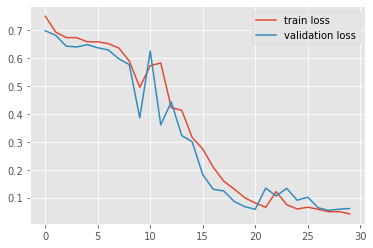

In [28]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.legend()

### 正解率

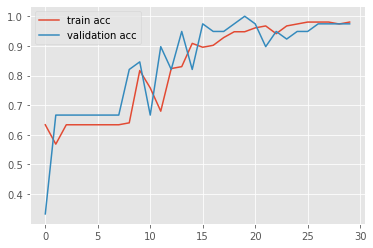

In [29]:
plt.plot(accs, label="train acc")
plt.plot(val_accs, label="validation acc")
plt.legend()

In [31]:
torch.save(model.to('cpu').state_dict(), "/content/drive/MyDrive/DS入門講座/手書きカレンダープロジェクト/models/初めてのテスト/model.pth")